<a href="https://colab.research.google.com/github/shishir-py/machine-learning-projects/blob/master/Yield_prediction_kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_path="/content/drive/MyDrive/Proj/yield prediction kaggle competation/train.csv"
test_path="/content/drive/MyDrive/Proj/yield prediction kaggle competation/test.csv"
sub_path="/content/drive/MyDrive/Proj/yield prediction kaggle competation/sample_submission.csv"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def read_csv(path):
    data=pd.read_csv(path)
    return data

In [ ]:
train_data=read_csv(train_path)
test_data=read_csv(test_path)
sub=read_csv(sub_path)


In [ ]:
sub.head()

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194


In [ ]:
test_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [ ]:
train_data.isnull().any()

id                      False
clonesize               False
honeybee                False
bumbles                 False
andrena                 False
osmia                   False
MaxOfUpperTRange        False
MinOfUpperTRange        False
AverageOfUpperTRange    False
MaxOfLowerTRange        False
MinOfLowerTRange        False
AverageOfLowerTRange    False
RainingDays             False
AverageRainingDays      False
fruitset                False
fruitmass               False
seeds                   False
yield                   False
dtype: bool

In [ ]:
#the id columns doesnot make any sense so drop the id columns
train_data.drop('id',axis=1, inplace=True)

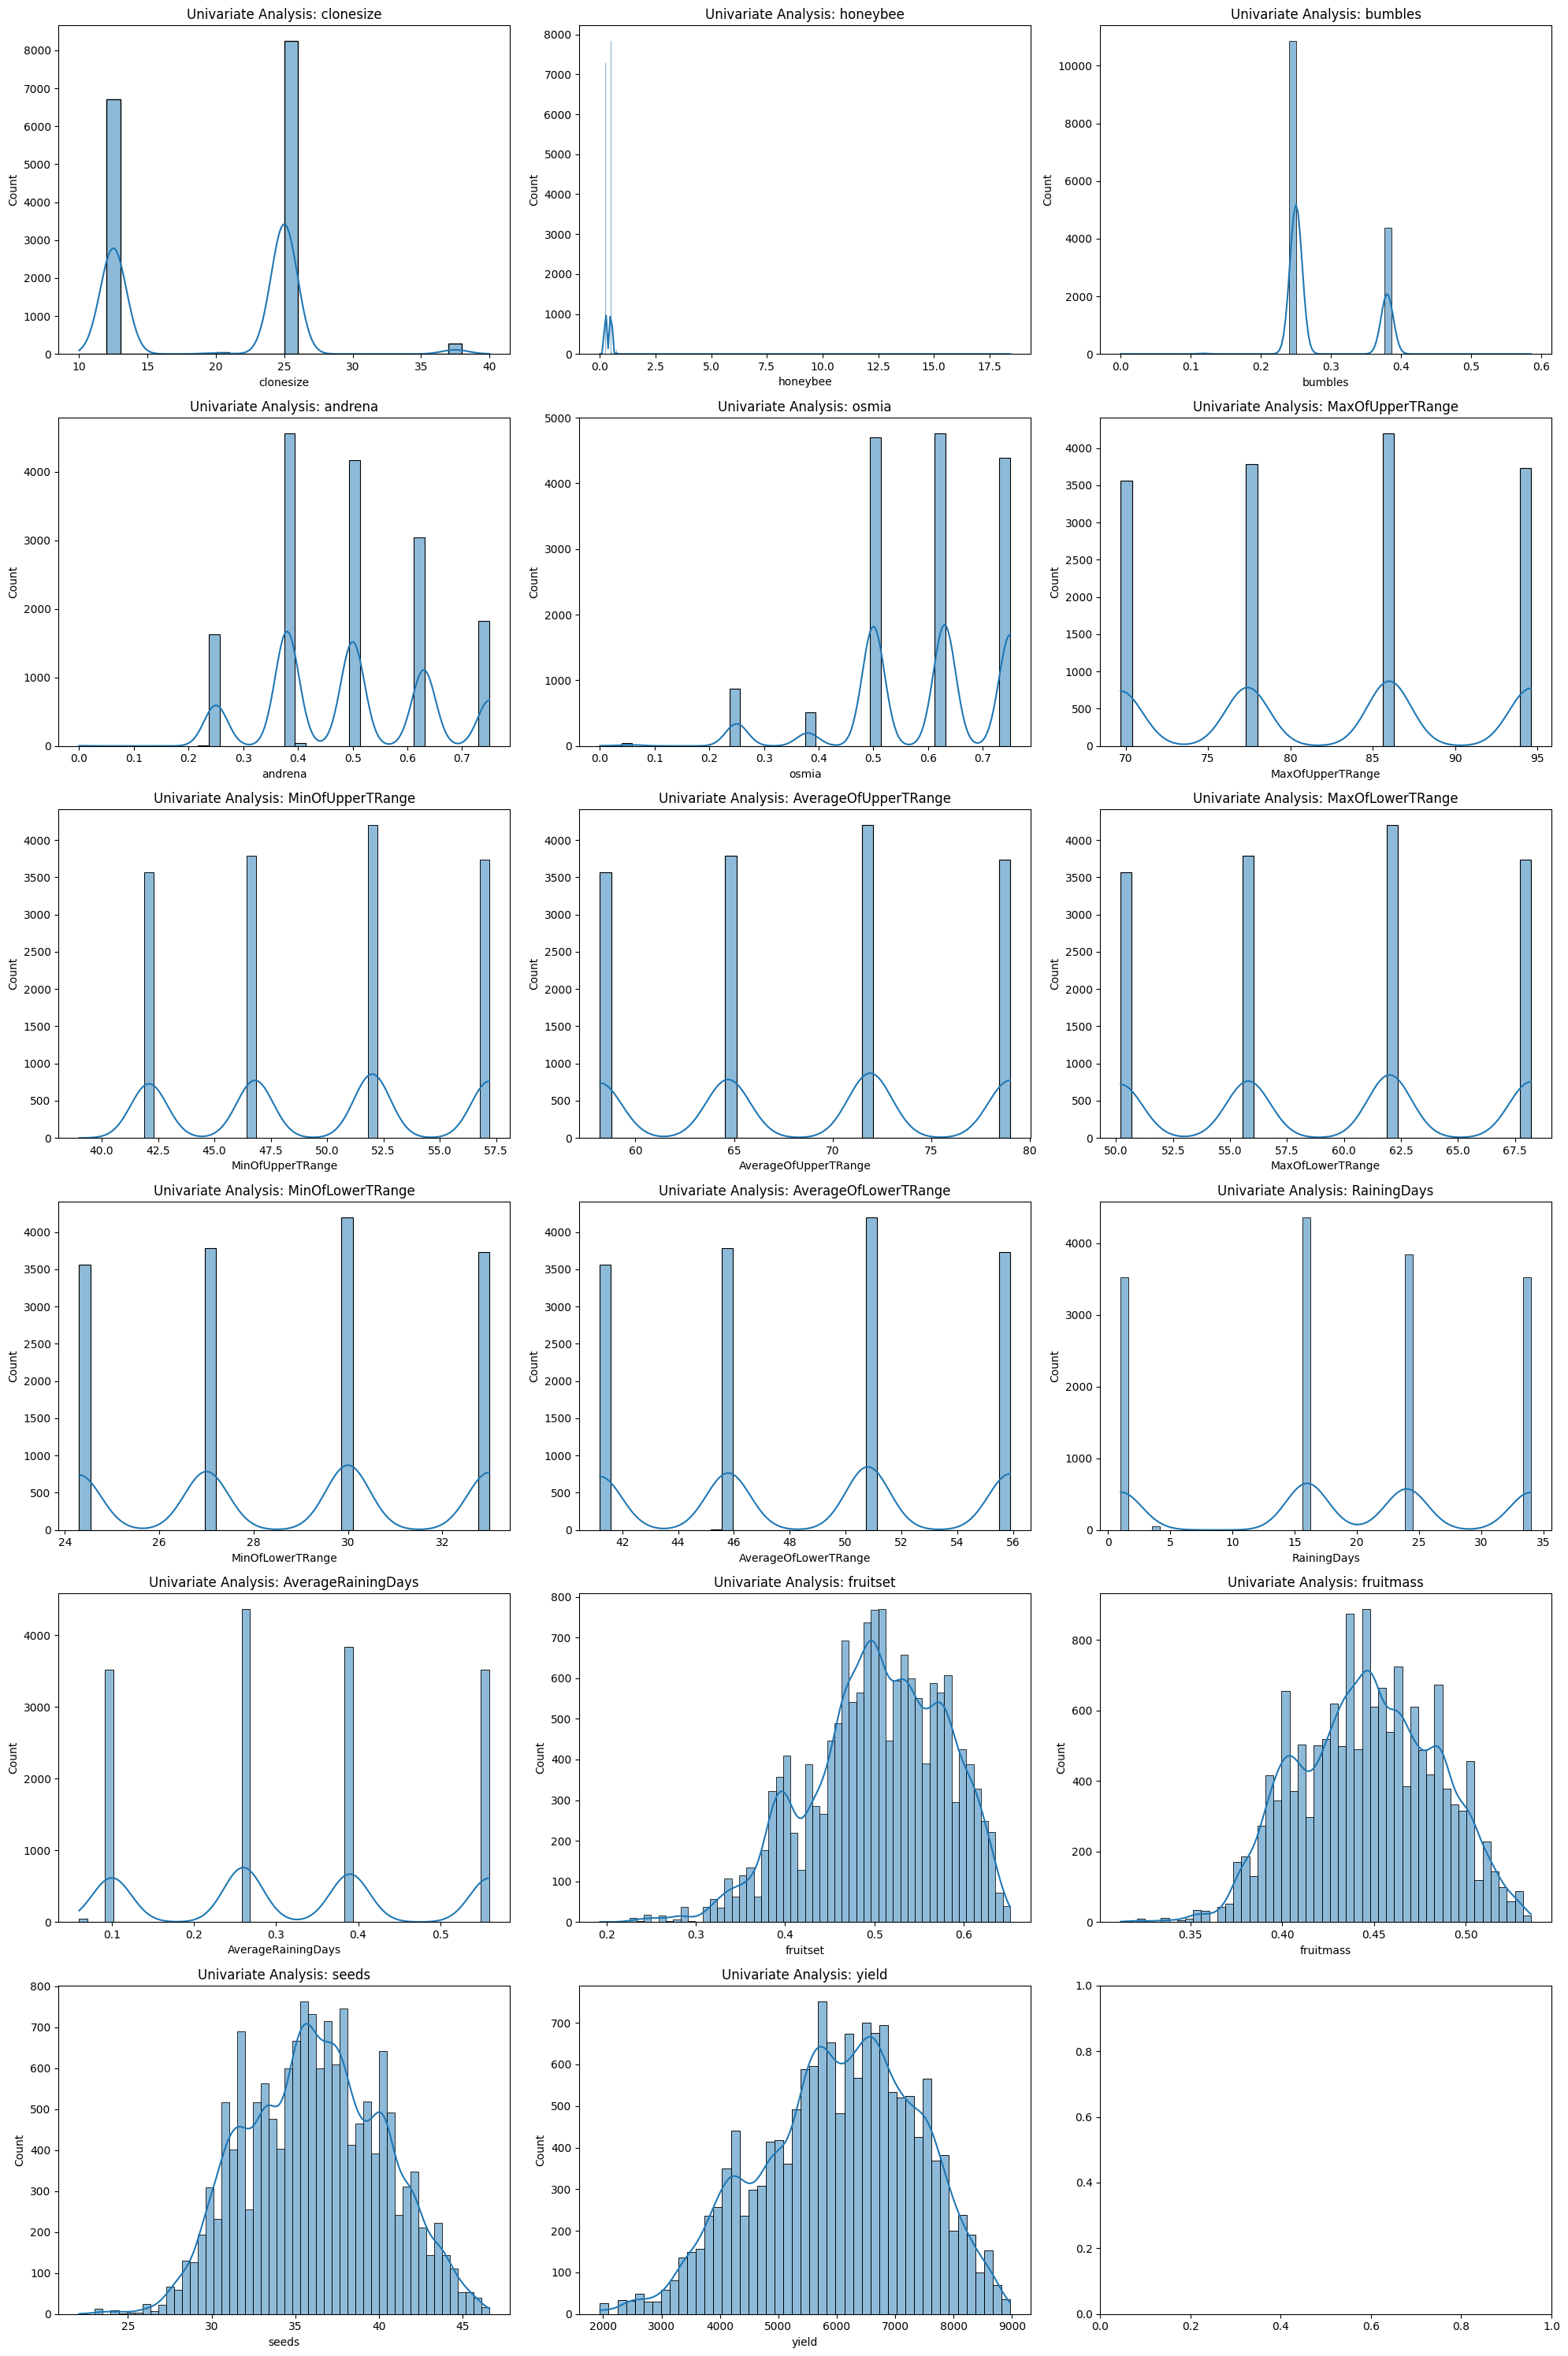

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df=train_data
num_rows = 6
num_cols = 3

# Create a new figure and set the size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Loop through each column and plot the univariate distribution in a subplot
for i, column in enumerate(df.columns):
    if column != "id":
        # Calculate the row and column index of the subplot
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        # Plot the univariate distribution in the appropriate subplot
        sns.histplot(df[column], kde=True, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title("Univariate Analysis: " + column)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

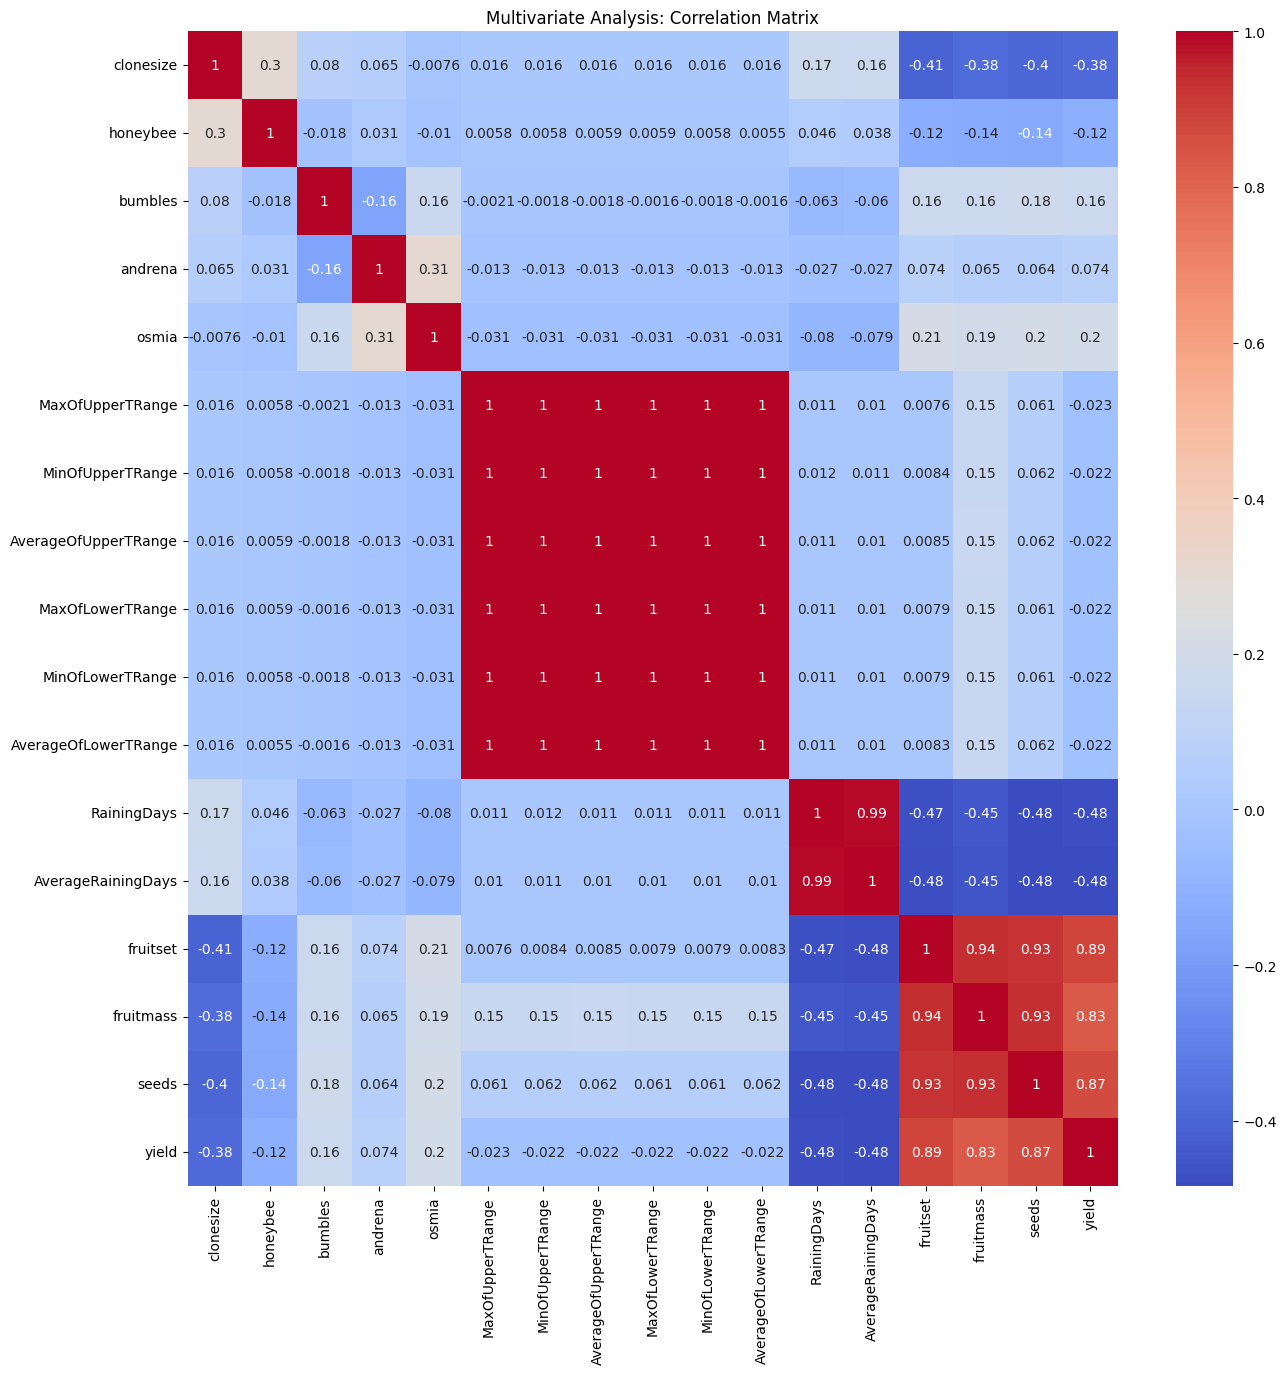

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Multivariate Analysis: Correlation Matrix")
plt.show()

In [ ]:
# Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Loading the train dataset
df_train = df

# Replacing the 'seeds', 'fruitmass', and 'fruitset' columns with their integer values
df_train['seeds'] = df_train['seeds'].astype(int)
df_train['fruitmass'] = df_train['fruitmass'].astype(int)
df_train['fruitset'] = df_train['fruitset'].astype(int)

# Splitting the dataset into features and target variable
X = df_train.drop(['yield'], axis=1)
y = df_train['yield']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fitting the model on the training data
gb_reg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gb_reg.predict(X_test)

# Evaluating the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 394.33058921511036


In [ ]:
# Creating a Gradient Boosting Regressor model with the best hyperparameters
best_gb_reg = GradientBoostingRegressor(learning_rate=0.1,
                                        max_depth=3,
                                        min_samples_leaf=2,
                                        min_samples_split=2,
                                        n_estimators=100,
                                        random_state=42)

# Fitting the model on the training data
best_gb_reg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = best_gb_reg.predict(X_test)

# Evaluating the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 392.0685598776585


In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# Loading the train dataset
df_train = df

# Replacing the 'seeds', 'fruitmass', and 'fruitset' columns with their integer values
df_train['seeds'] = df_train['seeds'].astype(int)
df_train['fruitmass'] = df_train['fruitmass'].astype(int)
df_train['fruitset'] = df_train['fruitset'].astype(int)

# Splitting the dataset into features and target variable
X = df_train.drop(['yield'], axis=1)
y = df_train['yield']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a CatBoost Regressor model
cat_reg = CatBoostRegressor(loss_function='MAE', random_state=42)

# Training the model on the training data
cat_reg.fit(X_train, y_train, verbose=False)

# Predicting the target variable on the testing data
y_pred = cat_reg.predict(X_test)

# Evaluating the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 381.2852439719179




---



---



In [ ]:
df_test=test_data
df_train=train_data

In [ ]:
df_train.reset_index(drop=True, inplace=True)

df_train["fruit_seed"] = df_train["fruitset"] * df_train["seeds"]
df_test["fruit_seed"] = df_test["fruitset"] * df_test["seeds"]

df_train["pollinators"] = df_train["honeybee"] + df_train["bumbles"] + df_train["andrena"] + df_train["osmia"]
df_test["pollinators"] = df_test["honeybee"] + df_test["bumbles"] + df_test["andrena"] + df_test["osmia"]

# Remove perfectly correlated features
features_to_remove = ['RainingDays', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'honeybee', 'bumbles', 'andrena' , 'osmia']
df_train.drop(features_to_remove, axis=1, inplace=True)
df_test.drop(features_to_remove, axis=1, inplace=True)
# Scale features
standard_scaler = StandardScaler()
X = df_train.drop(columns=['yield'])
X_scaled = standard_scaler.fit_transform(X)
df_train = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), df_train['yield']], axis=1)
X_scaled = standard_scaler.transform(df_test)
df_test = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# LightGBM,XGBoost,CatBoost

In [ ]:
df_train.columns

Index(['id', 'clonesize', 'AverageOfLowerTRange', 'AverageRainingDays',
       'fruitset', 'fruitmass', 'seeds', 'fruit_seed', 'pollinators', 'yield'],
      dtype='object')

In [ ]:
df_test.columns


Index(['id', 'clonesize', 'AverageOfLowerTRange', 'AverageRainingDays',
       'fruitset', 'fruitmass', 'seeds', 'fruit_seed', 'pollinators'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

# Load the dataset
df = df_train

# Split the dataset into features and target variable
X = df.drop(['yield'], axis=1)
y = df['yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(X_train, y_train)
lgb_pred = lgb_reg.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
print("LightGBM MAE:", lgb_mae)

# Train XGBoost model
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
print("XGBoost MAE:", xgb_mae)

# Train CatBoost model
cat_reg = CatBoostRegressor(random_state=42, verbose=False)
cat_reg.fit(X_train, y_train)
cat_pred = cat_reg.predict(X_test)
cat_mae = mean_absolute_error(y_test, cat_pred)
print("CatBoost MAE:", cat_mae)


LightGBM MSE: 352.9730930005892
XGBoost MSE: 369.5138138188128
CatBoost MSE: 354.97845896939333




---



---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = df_train

# Preprocess the data
df['seeds'] = df['seeds'].astype(int)
df['fruitmass'] = df['fruitmass'].astype(int)
df['fruitset'] = df['fruitset'].astype(int)

X = df.drop('yield', axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM parameter tuning
lgbm = LGBMRegressor(random_state=42)

lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'num_leaves': [31, 63],
    'min_child_samples': [1, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

lgbm_grid = GridSearchCV(lgbm, lgbm_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
lgbm_grid.fit(X_train, y_train)

lgbm_best_params = lgbm_grid.best_params_
print("LightGBM Best Parameters:", lgbm_best_params)

# Train the models with the best parameters
lgbm_best = LGBMRegressor(**lgbm_best_params, random_state=42)


LightGBM Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}


In [ ]:
# CatBoost parameter tuning
cat = CatBoostRegressor(random_state=42, verbose=False)

cat_param_grid = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
}

cat_grid = GridSearchCV(cat, cat_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
cat_grid.fit(X_train, y_train)

cat_best_params = cat_grid.best_params_
print("CatBoost Best Parameters:", cat_best_params)

cbr_best = LGBMRegressor(**lgbm_best_params, random_state=42)


CatBoost Best Parameters: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}


In [ ]:
# XGBoost parameter tuning
xgb = XGBRegressor(random_state=42)

xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

xgb_best_params = xgb_grid.best_params_
print("XGBoost Best Parameters:", xgb_best_params)

xgb_best = LGBMRegressor(**lgbm_best_params, random_state=42)


XGBoost Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
def result(models):
  for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_absolute_error(y_test, cat_pred)
    print(f"{model} MSE:", mse)

**CatBoost Best Parameters: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}**

**LightGBM Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}**

**XGBoost Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}**



In [ ]:
models=[xgb_best,cbr_best,lgbm_best]
result(models)

LGBMRegressor(colsample_bytree=0.9, max_depth=3, min_child_samples=1,
              random_state=42, subsample=0.8) MSE: 354.97845896939333
LGBMRegressor(colsample_bytree=0.9, max_depth=3, min_child_samples=1,
              random_state=42, subsample=0.8) MSE: 354.97845896939333
LGBMRegressor(colsample_bytree=0.9, max_depth=3, min_child_samples=1,
              random_state=42, subsample=0.8) MSE: 354.97845896939333


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load the dataset
df = df_train

# Split the dataset into features and target variable
X = df.drop(['yield'], axis=1)
y = df['yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for each model
lgbm_params = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3],
    'subsample': [0.8],
    'colsample_bytree': [0.9],
    'num_leaves': [31],
    'min_child_samples': [1]
}

xgb_params = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3],
    'subsample': [0.9],
    'colsample_bytree': [0.9]
}

catboost_params = {
    'depth': [5],
    'iterations': [200],
    'learning_rate': [0.1]
}

# Create the models with the best parameters
best_lgbm = LGBMRegressor(random_state=42, **GridSearchCV(LGBMRegressor(random_state=42), lgbm_params, cv=5, scoring='neg_mean_squared_error').fit(X_train, y_train).best_params_)
best_xgb = XGBRegressor(random_state=42, **GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring='neg_mean_squared_error').fit(X_train, y_train).best_params_)
best_catboost = CatBoostRegressor(random_state=42, **GridSearchCV(CatBoostRegressor(random_state=42, verbose=False), catboost_params, cv=5, scoring='neg_mean_squared_error').fit(X_train, y_train).best_params_)

# Train the models on the training set
best_lgbm.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)
best_catboost.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lgbm = best_lgbm.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_catboost = best_catboost.predict(X_test)

# Calculate the MSE for each model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)

# Print the MSE for each model
print("LightGBM MAE:", mae_lgbm)
print("XGBoost MAE:", mae_xgb)
print("CatBoost MAE:", mae_catboost)


0:	learn: 1238.7136072	total: 2.85ms	remaining: 567ms
1:	learn: 1151.9467504	total: 5.49ms	remaining: 544ms
2:	learn: 1073.3970331	total: 7.56ms	remaining: 497ms
3:	learn: 1008.0550669	total: 9.9ms	remaining: 485ms
4:	learn: 950.2407023	total: 11.8ms	remaining: 462ms
5:	learn: 897.2619824	total: 14ms	remaining: 452ms
6:	learn: 853.3104134	total: 16ms	remaining: 441ms
7:	learn: 814.6213559	total: 18.1ms	remaining: 435ms
8:	learn: 780.5816187	total: 20.1ms	remaining: 427ms
9:	learn: 749.8155349	total: 22.2ms	remaining: 421ms
10:	learn: 726.7844211	total: 24.1ms	remaining: 415ms
11:	learn: 706.0809534	total: 26.3ms	remaining: 413ms
12:	learn: 686.7549498	total: 28.5ms	remaining: 409ms
13:	learn: 670.9753257	total: 30.6ms	remaining: 407ms
14:	learn: 657.1877633	total: 32.8ms	remaining: 404ms
15:	learn: 645.5890151	total: 35ms	remaining: 403ms
16:	learn: 635.4255565	total: 37.2ms	remaining: 401ms
17:	learn: 626.3426745	total: 39.5ms	remaining: 399ms
18:	learn: 619.6243133	total: 41.8ms	rema